# Sleep EEG spectral analyses

## Intoductory notes:
This notebook presents spectral analyses functionality:
* Spectrogram
* PSD per sleep stage
* Topomaps for regular and parametrized spectra per sleep stage
* Additional results such as hypnogram and sleep statistics.

Recommended readings and watchings:
1. [Mike X Cohen: Static spectral analysis](https://youtube.com/playlist?list=PLn0OLiymPak2jxGCbWrcgmXUtt9Lbjj_A)
2. [FOOOF: Topographical analyses with MNE](https://fooof-tools.github.io/fooof/auto_examples/analyses/plot_mne_example.html#topographical-analyses-with-mne)

## Import data

### Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
from sleepeeg.pipeline import SpectralPipe

### Initialize SpectralPipe object

In [3]:
spectral_pipe = SpectralPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw.fif",  
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",  # A directory you want the results to be saved in
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",  # Point-per-row type of hypnogram
    hypno_freq=1  # Hypnogram's sampling frequency (visbrain's hypnograms default to 1)
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


03-May-23 14:10:27 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


## Hypnospectrogram

Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.


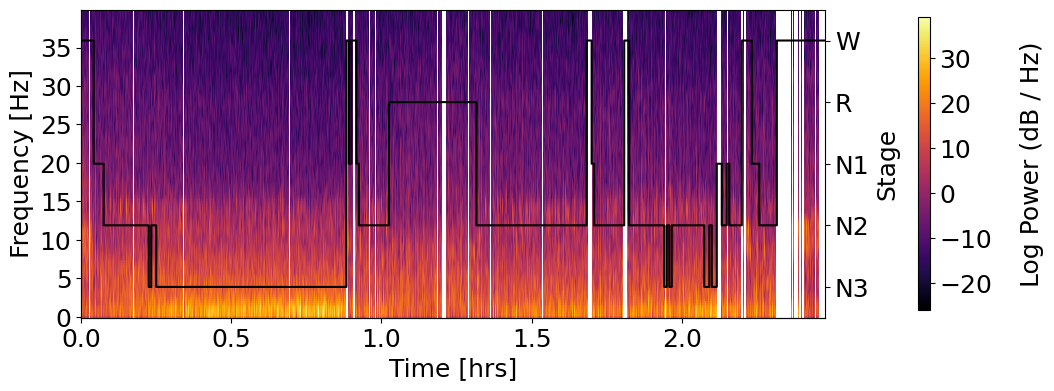

In [4]:
spectral_pipe.plot_hypnospectrogram(
    picks=['E101'],  # Channel[s] to compute spectrogram on.
    sec_per_seg=4.096,  # sec_per_seg = n_per_seg/sampling_frequency
    freq_range=(0,40),  # Y axis limits
    cmap='inferno',  # Matplotlib colormap as in https://matplotlib.org/stable/tutorials/colors/colormaps.html
    overlap=True,  # Whether to plot hypnogram over spectrogram (True) or on top of it (False)
    save=True  # Whether to save the plot as a file.
    )

## Power Spectral Density

Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.


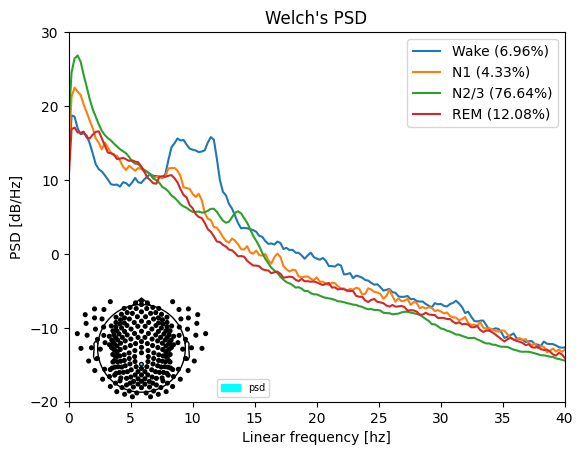

In [8]:
spectral_pipe.plot_psd_per_stage(
    picks=['E101'],  # Channel[s] to run PSD estimation on.
    psd_range=(-20, 30),  # Y axis limits
    freq_range=(0, 40),  # X axis limits
    xscale='linear',  # Matplotlib xscale. Can be {"linear", "log", "symlog", "logit", ...} or ScaleBase
    sleep_stages={'Wake' :0, 'N1' :1, 'N2/3' :(2,3), 'REM': 4},  # Sleep stages to calculate PSD on.
    plot_sensors=True,  # Whether to plot EEG sensors showing which channels were used to compute PSD.
    save=True,  # Whether to save the plot as a png file.
    psd_method_args=dict(nperseg=spectral_pipe.sf*4.096),  # Arguments passed to the PSD method, e.g., welch.
    subplots_args=None,  # Arguments passed to the plt.subplots(). Have no effect if axis is provided.
    )

## Topomap

Plots a topomap for one stage and one frequency band

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.


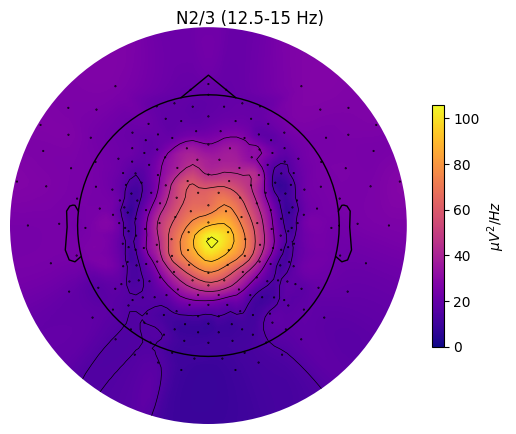

In [9]:
spectral_pipe.plot_topomap(
    stage='N2/3',  # Stage to plot topomap for.
    band={'SMR': (12.5, 15)},  # Band to plot topomap for.
    # Should contain at least index of the provided "stage".
    sleep_stages={'Wake':0,'N1': 1, 'N2/3': (2,3)},  
    dB=False,  # Whether to transform PSD to dB/Hz
    fooof=False,  # Whether to plot parametrised spectra.
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    psd_method_args=dict(nperseg=spectral_pipe.sf*4.096),  # Arguments passed to the PSD method, e.g., welch.
    topomap_args=dict(cmap='plasma'),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    fooof_group_args=None,  # Arguments passed to the fooof.FOOOFGroup().
    fooof_get_band_peak_fg_args=None,  # Arguments passed to the fooof.analysis.get_band_peak_fg().
    subplots_args=None,  # Arguments passed to the plt.subplots(). Have no effect if axis is provided.
)

## Topomap collage
Plot a topomap for multiple bands and sleep_stages

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.


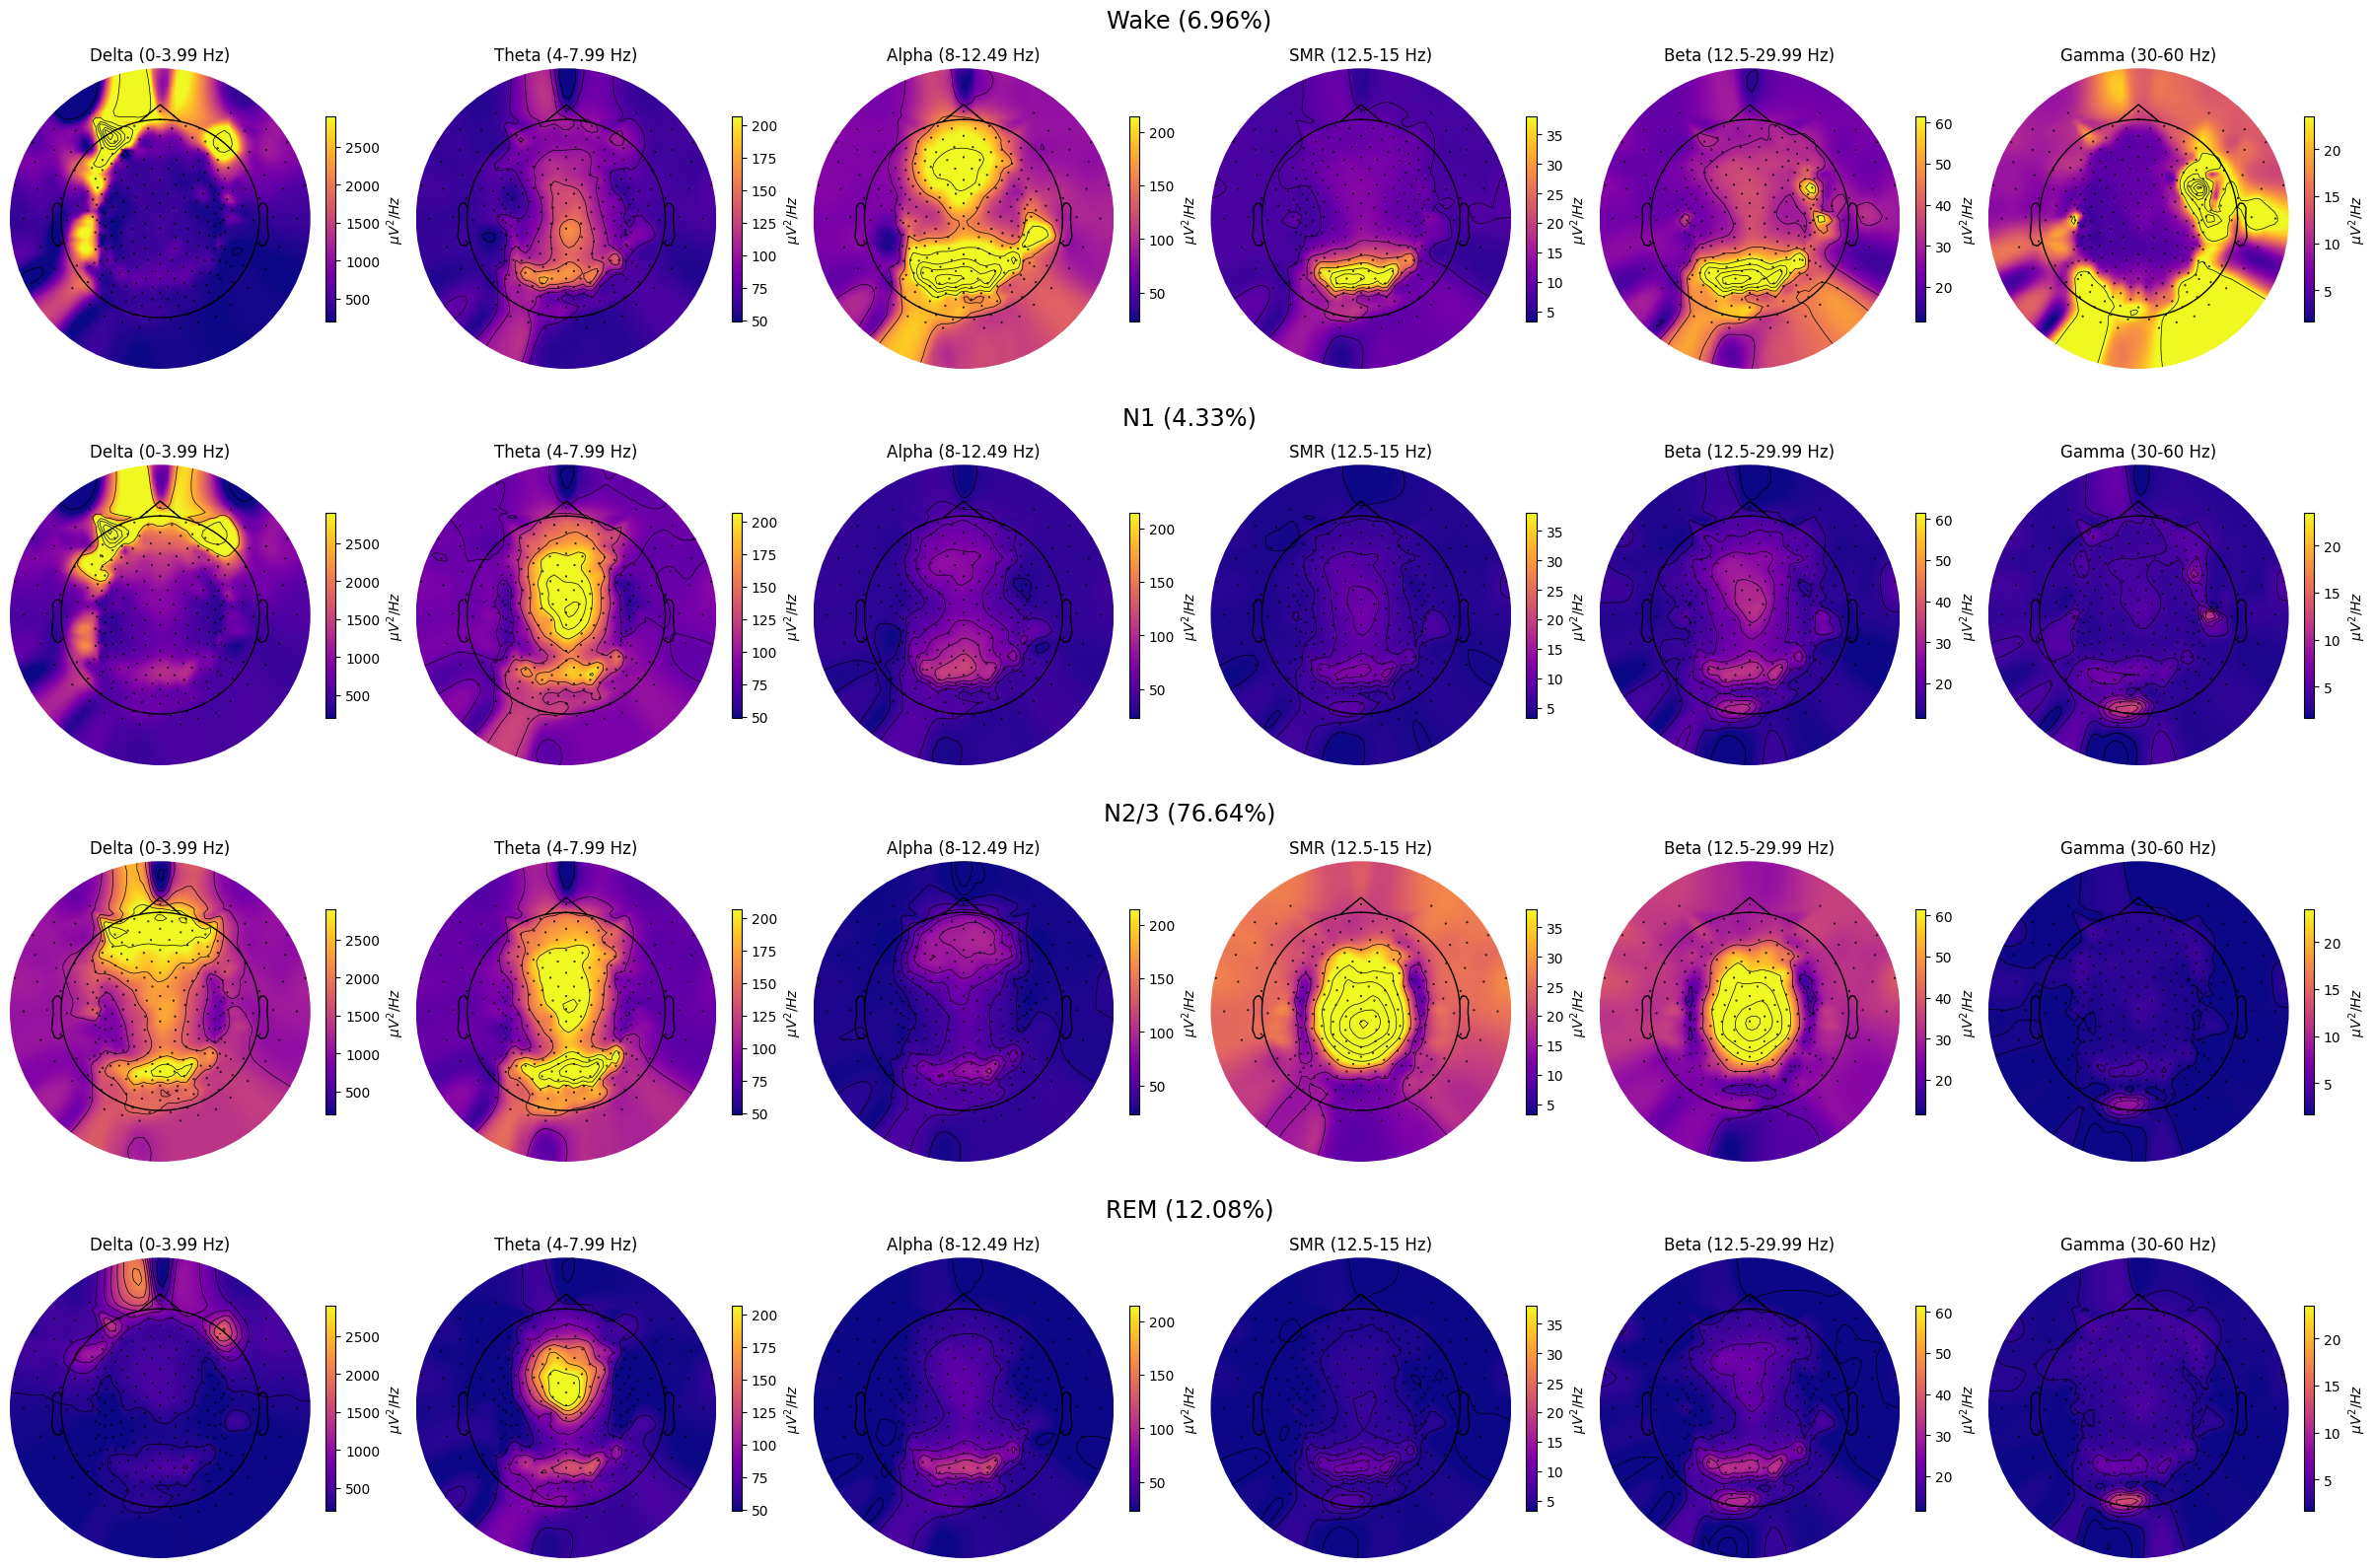

In [11]:
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands = {'Delta': (0, 3.99), 'Theta': (4, 7.99),
            'Alpha': (8, 12.49), 'SMR': (12.5, 15), 
            'Beta': (12.5, 29.99), 'Gamma': (30, 60)},
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all", 
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={'Wake' :0, 'N1' :1, 'N2/3': (2,3), 'REM': 4},  
    dB=False,  # Whether to transform PSD to dB/Hz.
    fooof=False,  # Whether to plot parametrised spectra.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    save=True,  # Whether to save the plot as a file.
    psd_method_args=dict(nperseg=spectral_pipe.sf*4.096),  # Arguments passed to the PSD method, e.g., welch.
    topomap_args=dict(cmap='plasma'),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    fooof_group_args=None,  # Arguments passed to the fooof.FOOOFGroup().
    fooof_get_band_peak_fg_args=None,  # Arguments passed to the fooof.analysis.get_band_peak_fg().
    figure_args=None,  # Arguments passed to the plt.figure().
)

## FOOOF topomap collage

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.


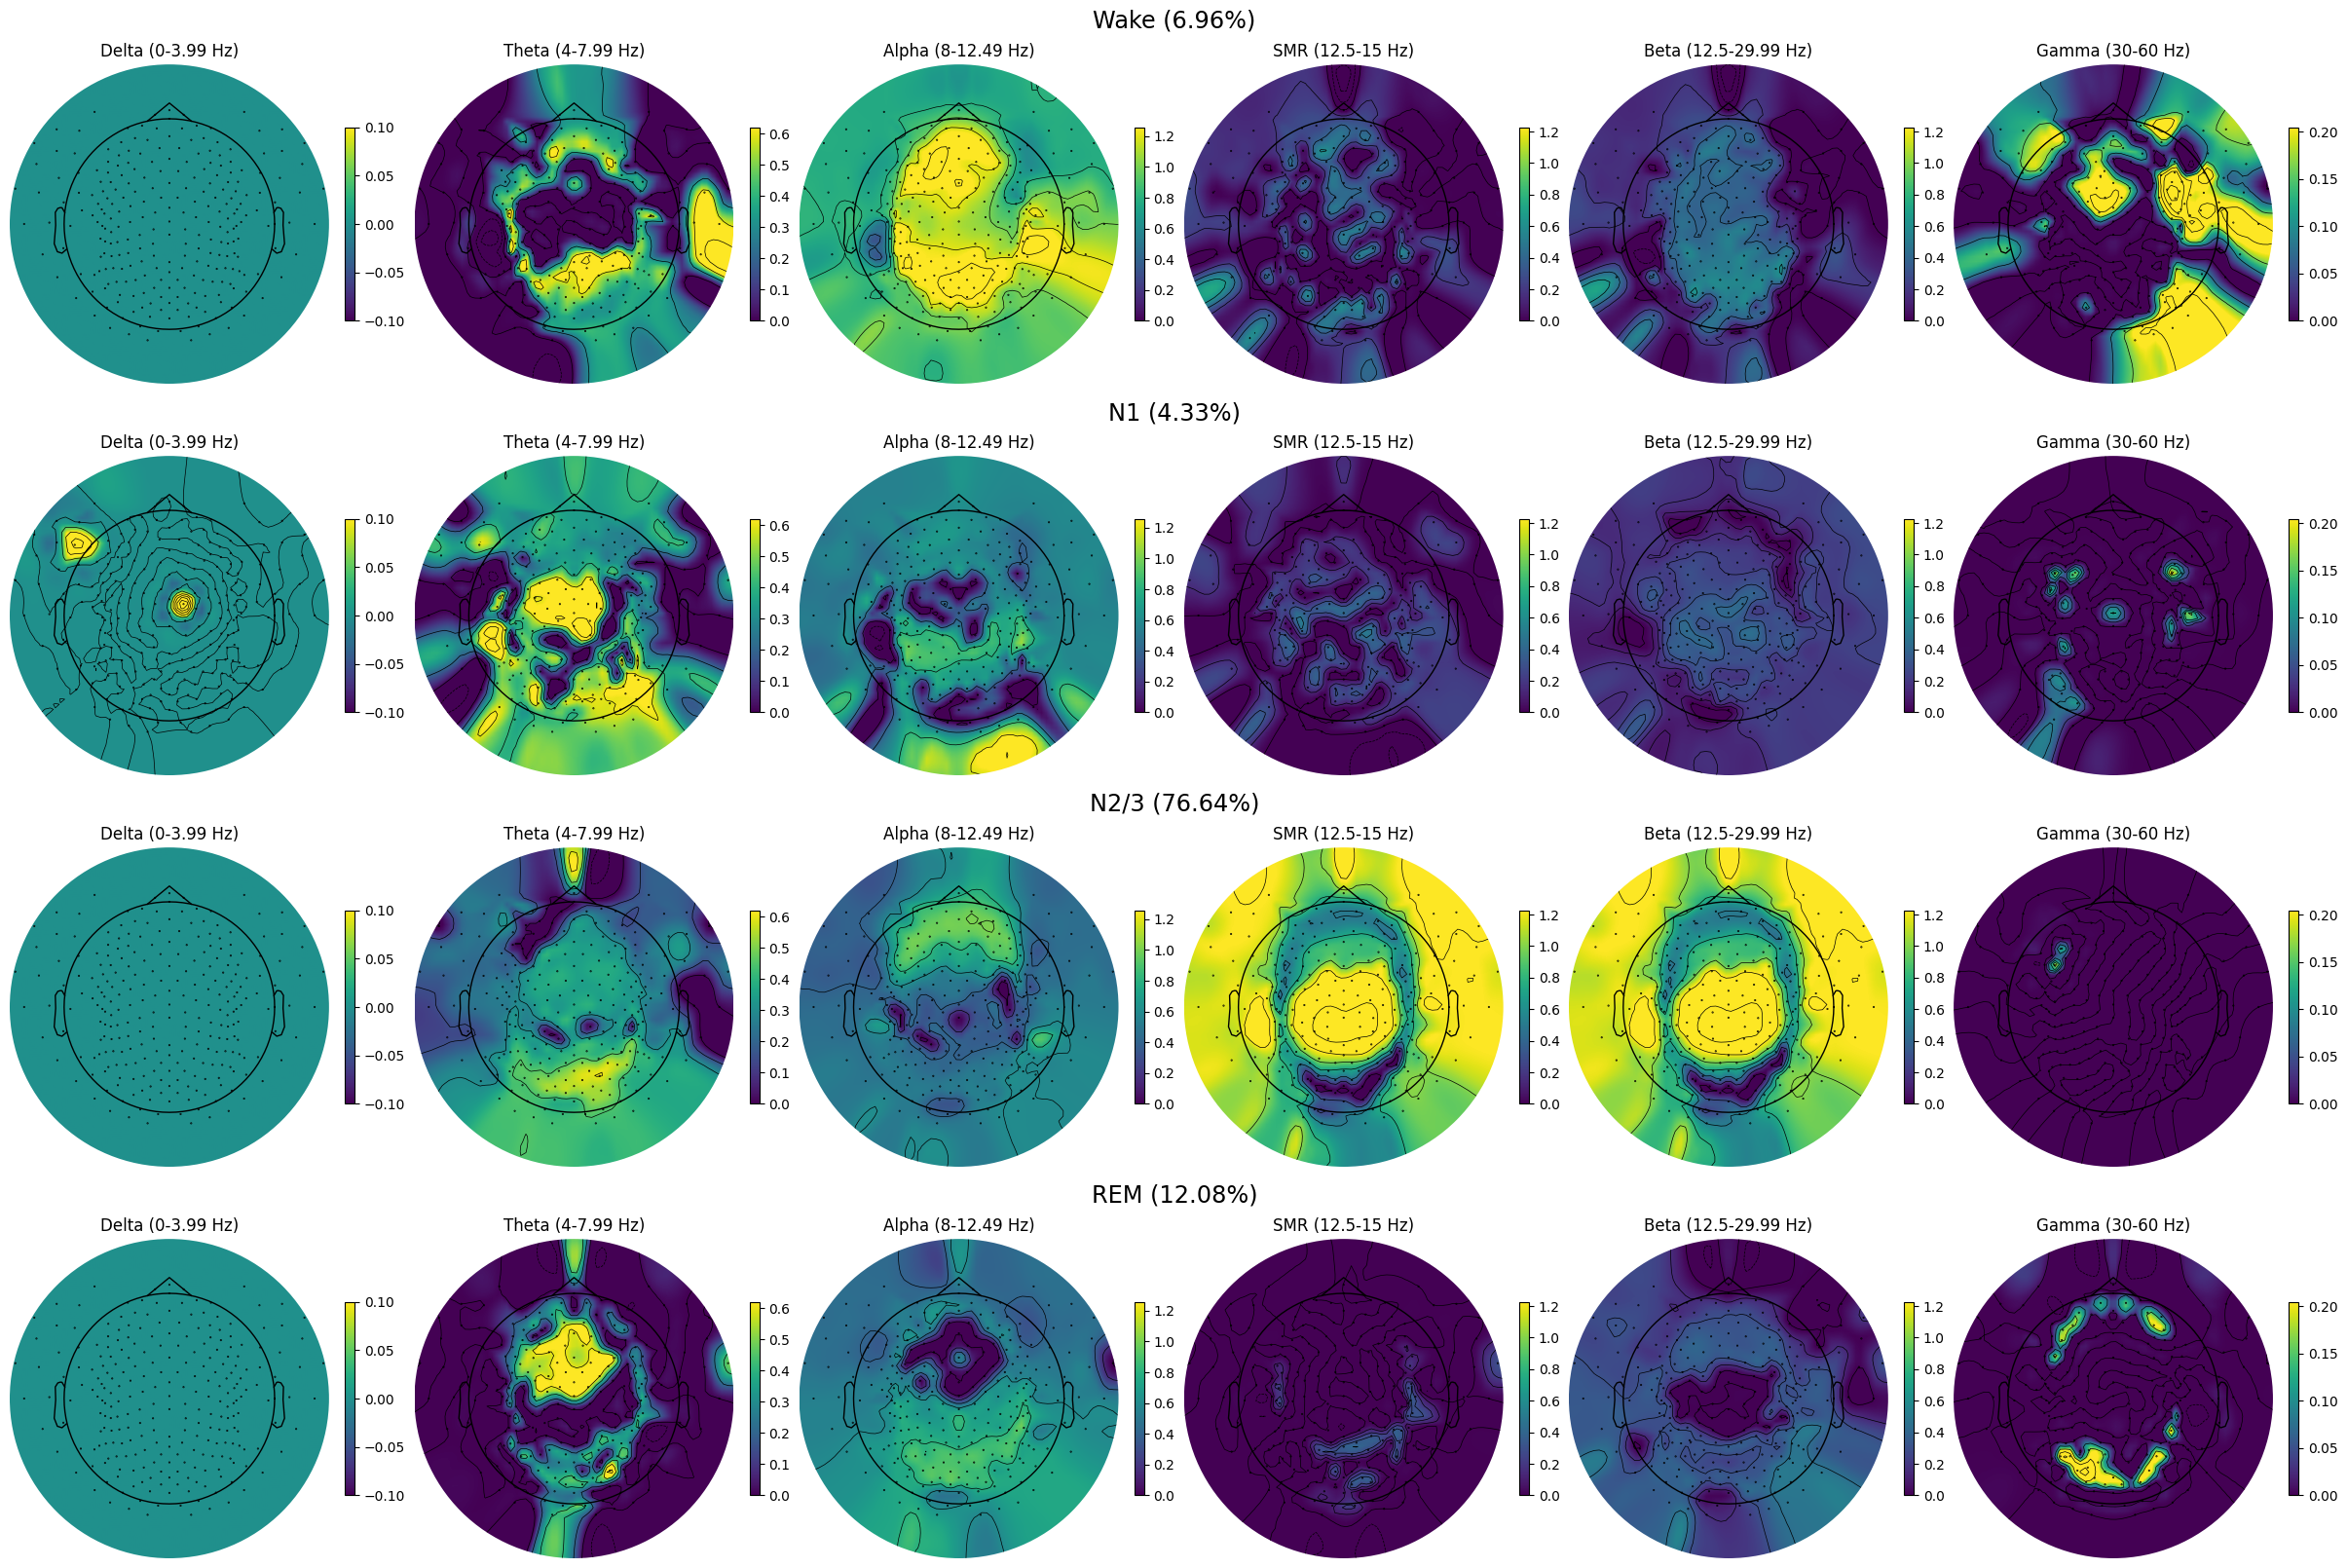

In [12]:
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands = {'Delta': (0, 3.99), 'Theta': (4, 7.99),
            'Alpha': (8, 12.49), 'SMR': (12.5, 15), 
            'Beta': (12.5, 29.99), 'Gamma': (30, 60)},
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all", 
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={'Wake' :0, 'N1' :1, 'N2/3': (2,3), 'REM': 4},  
    dB=False,  # Whether to transform PSD to dB/Hz.
    fooof=True,  # Whether to plot parametrised spectra.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    save=True,  # Whether to save the plot as a file.
    psd_method_args=dict(nperseg=spectral_pipe.sf*4.096),  # Arguments passed to the PSD method, e.g., welch.
    topomap_args=dict(cmap='viridis'),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    # Arguments passed to the fooof.FOOOFGroup().
    fooof_group_args=dict( 
        peak_width_limits=[1,6],
        min_peak_height=0.15,
        peak_threshold=2.0,
        aperiodic_mode='fixed',
        verbose=False
    ),  
    # Arguments passed to the fooof.analysis.get_band_peak_fg().
    fooof_get_band_peak_fg_args=dict(
        threshold=None,
        thresh_param='PW',
        attribute='peak_params'
    ),  
    figure_args=None,  # Arguments passed to the plt.figure().
)

## Sleep Stats

In [11]:
spectral_pipe.sleep_stats(save=True)